## PyTorch Introduction

Today, we will be intoducing PyTorch, "an open source deep learning platform that provides a seamless path from research prototyping to production deployment".

This notebook is by no means comprehensive. If you have any questions the documentation and Google are your friends.

Goal takeaways:

- Automatic differentiation is a powerful tool
- PyTorch implements common functions used in deep learning

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

torch.manual_seed(446)
np.random.seed(446)

### Tensors and relation to numpy
By this point, we have worked with numpy quite a bit. PyTorch's basic building block, the `tensor` is similar to numpy's `ndarray`.

In [2]:
# we create tensors in a similar way to numpy nd arrays
x_numpy = np.array([0.1, 0.2, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy:', x_numpy)
print('x_torch:', x_torch)

x_numpy: [0.1 0.2 0.3]
x_torch: tensor([0.1000, 0.2000, 0.3000])


In [3]:
# to and from numpy, pytorch
print('convert numpy array to pytorch tensor: ', torch.from_numpy(x_numpy))
print('convert pytorch tensor to numpy array: ', x_torch.numpy())

convert numpy array to pytorch tensor:  tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)
convert pytorch tensor to numpy array:  [0.1 0.2 0.3]


In [4]:
# we can do basic operations like +-*/
y_numpy = np.array([3,4,5.])
y_torch = torch.tensor([3,4,5.])
print('y_numpy: ', y_numpy)
print('y_torch: ', y_torch)
print("x+y")
print(x_numpy + y_numpy, x_torch + y_torch)

y_numpy:  [3. 4. 5.]
y_torch:  tensor([3., 4., 5.])
x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])


In [5]:
# many functions that are in numpy are also in pytorch
print("norm")
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print(torch.zeros(3, 4))  # or torch.zeros[3, 4]
print(torch.ones([3, 4]))

norm
0.37416573867739417 tensor(0.3742)
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [144]:
torch.eye(5)   # identity matrix

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [49]:
# to apply an operation along a dimension,
# we use the dim keyword argument instead of axis
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_torch = torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0))

mean along the 0th dimension
[2. 3.] tensor([2., 3.])


### `Tensor.view`
We can use the `Tensor.view()` function to reshape tensors similarly to `numpy.reshape()`

It can also automatically calculate the correct dimension if a `-1` is passed in. This is useful if we are working with batches, but the batch size is unknown.

In [74]:
# "MNIST"
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H))

print(X.shape)
#print(X.view(N, C, W, H)) --> same as X
print()
print(len(X[0]))
print(X[0].shape)
print('X[0] = ', X[0])

torch.Size([10000, 3, 28, 28])

3
torch.Size([3, 28, 28])
X[0] =  tensor([[[-1.4121, -0.0874, -0.6086,  ...,  1.3957, -0.7130,  1.0147],
         [ 0.3467,  2.3918,  0.6678,  ..., -0.3052,  0.0239, -0.8353],
         [ 0.5884, -1.5682, -2.4342,  ...,  0.2125, -0.0035, -0.7842],
         ...,
         [ 0.6067,  0.0473,  1.5155,  ...,  0.5980,  0.5612,  0.2637],
         [ 1.2541, -1.0848,  2.4202,  ...,  1.1339, -0.6464,  0.8272],
         [-0.5099,  0.5831,  0.8653,  ...,  0.2318, -0.2059, -1.3331]],

        [[ 0.5896, -0.7593, -0.3085,  ..., -2.0011,  0.5270, -1.1243],
         [-0.0666,  0.0551, -1.3653,  ...,  0.7131,  0.0996,  0.5878],
         [-0.9631,  0.4332, -0.3959,  ...,  0.0126, -0.2751, -0.6156],
         ...,
         [ 0.7643,  0.7385, -1.3749,  ..., -0.1596,  0.3862, -1.0459],
         [ 0.8313,  0.4132, -1.2321,  ..., -0.7378,  0.5760, -2.0105],
         [-0.2812,  0.5383, -0.2314,  ..., -0.5351,  1.0092, -0.1965]],

        [[-1.1209, -0.1014, -1.0861,  ..., -0.4818

In [75]:
print(len(X[0][0]))
print(X[0][0].shape)
print('X[0][0] = ', X[0][0])

28
torch.Size([28, 28])
X[0][0] =  tensor([[-1.4121e+00, -8.7391e-02, -6.0861e-01, -1.3209e-01, -4.7038e-01,
          6.1692e-01,  8.8042e-02,  6.1676e-01,  3.0761e-01,  4.7442e-01,
          9.7667e-01,  2.1680e-01, -7.3591e-01, -2.3440e-01, -1.2579e+00,
          1.2654e+00, -7.3466e-01,  1.9029e-01, -1.1451e+00,  3.7282e-01,
         -5.6274e-01,  6.1462e-01, -4.3212e-01,  1.3453e+00, -1.1576e+00,
          1.3957e+00, -7.1305e-01,  1.0147e+00],
        [ 3.4667e-01,  2.3918e+00,  6.6780e-01, -8.1924e-01, -1.9880e-02,
          3.4192e-01,  6.9296e-01, -6.3360e-01, -1.5114e-01, -6.9942e-01,
         -8.9167e-01,  1.4526e+00, -9.4915e-01, -3.4509e-01,  4.0183e-01,
         -1.5675e-01, -1.1554e+00,  1.7172e+00,  1.1605e+00, -1.1764e-01,
         -1.3535e+00, -1.7649e-02,  2.5539e+00,  1.1108e+00,  6.6340e-01,
         -3.0522e-01,  2.3852e-02, -8.3526e-01],
        [ 5.8837e-01, -1.5682e+00, -2.4342e+00,  5.1111e-01,  2.6389e+00,
         -4.8348e-01,  3.3829e-01, -1.6088e+00,  2.17

In [78]:
print(len(X[0][0][0]))
print(X[0][0][0].shape)
print('X[0][0][0] = ', X[0][0][0])

28
torch.Size([28])
X[0][0][0] =  tensor([-1.4121, -0.0874, -0.6086, -0.1321, -0.4704,  0.6169,  0.0880,  0.6168,
         0.3076,  0.4744,  0.9767,  0.2168, -0.7359, -0.2344, -1.2579,  1.2654,
        -0.7347,  0.1903, -1.1451,  0.3728, -0.5627,  0.6146, -0.4321,  1.3453,
        -1.1576,  1.3957, -0.7130,  1.0147])


In [89]:
print(X.view(N, C, 784))
print(X.view(N, C, 784).shape)
print(X.view(-1, C, 784).shape) # automatically choose the 0th dimension

tensor([[[-1.4121, -0.0874, -0.6086,  ...,  0.2318, -0.2059, -1.3331],
         [ 0.5896, -0.7593, -0.3085,  ..., -0.5351,  1.0092, -0.1965],
         [-1.1209, -0.1014, -1.0861,  ...,  0.1623,  1.3704,  1.9545]],

        [[-0.4503,  0.3242,  0.7501,  ...,  0.0765,  0.2745,  2.2285],
         [-0.4756, -0.3448,  1.4012,  ...,  2.3864,  0.8555,  0.5550],
         [-1.3253, -0.7821, -0.1847,  ...,  0.2217, -0.4750,  0.3807]],

        [[-0.1679, -0.3496, -2.7537,  ..., -1.2589, -1.8643,  1.6670],
         [ 0.6438,  1.3109,  0.5111,  ..., -0.5399,  1.0037, -1.3807],
         [-1.4049,  0.4031, -1.0448,  ...,  0.0238,  0.8917, -0.8393]],

        ...,

        [[ 0.7927, -0.9863, -0.1478,  ..., -1.2914,  1.5541,  2.2126],
         [ 1.0840, -1.3998,  0.1098,  ...,  0.0792,  0.0517,  0.1686],
         [ 1.0107, -2.3045, -0.6211,  ...,  0.0435, -1.1281,  1.7873]],

        [[ 1.1980, -0.5927,  0.2955,  ...,  0.5527, -0.2377,  0.4311],
         [ 0.4251,  1.2336,  0.4951,  ..., -0.2386, -0.

In [83]:
a = torch.randn(4, 4)
a.size()

torch.Size([4, 4])

In [85]:
b = a.view(16)
b.size()

torch.Size([16])

In [87]:
c = a.view(-1, 8)  # the size -1 is inferred from other dimensions
c.size()

torch.Size([2, 8])

In [88]:
print(a)
print(b)
print(c)

tensor([[-0.4322,  1.4135, -0.8763, -0.3586],
        [-0.4639,  1.1372, -0.7190, -0.8052],
        [-0.6012,  0.0243, -0.9133,  0.7891],
        [ 0.4738,  2.4049,  1.6842,  0.8760]])
tensor([-0.4322,  1.4135, -0.8763, -0.3586, -0.4639,  1.1372, -0.7190, -0.8052,
        -0.6012,  0.0243, -0.9133,  0.7891,  0.4738,  2.4049,  1.6842,  0.8760])
tensor([[-0.4322,  1.4135, -0.8763, -0.3586, -0.4639,  1.1372, -0.7190, -0.8052],
        [-0.6012,  0.0243, -0.9133,  0.7891,  0.4738,  2.4049,  1.6842,  0.8760]])


## Computation graphs
(Supplementary materials: https://colah.github.io/posts/2015-08-Backprop/)

What's special about PyTorch's tensor object is that it implicitly creates a computation graph in the background. A computation graph is a a way of writing a mathematical expression as a graph. There is an algorithm to compute the gradients of all the variables of a computation graph in time on the same order it is to compute the function itself.

Consider the expression  $e=(a+b)∗(b+1)$  with values  $a=2,b=1$ . We can draw the evaluated computation graph as
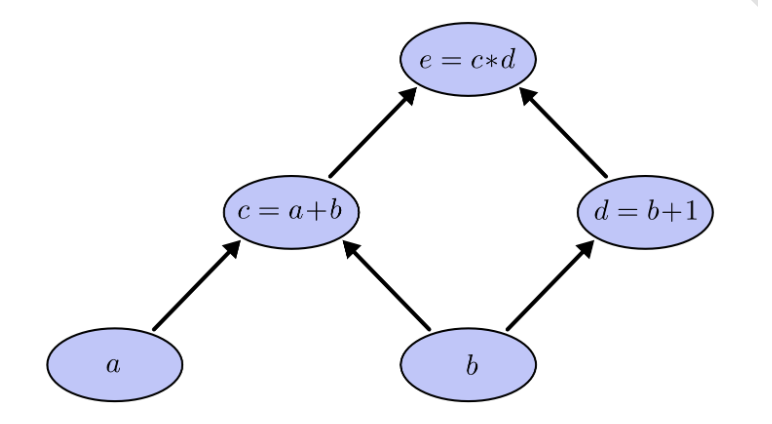

In PyTorch, we can write this as

In [4]:
a = torch.tensor(2.0, requires_grad=True) # we set requires_grad=True to let PyTorch know to keep the graph
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


We can see that PyTorch kept track of the computation graph for us.

### PyTorch as an auto grad framework
Now that we have seen that PyTorch keeps the graph around for us, let's use it to compute some gradients for us.

Consider the function  $f(x)=(x−2)^2$ .

Q: Compute  $\frac{d}{dx}f(x)$  and then compute  $f′(1)$ .

We make a `backward()` call on the leaf variable (`y`) in the computation, computing all the gradients of `y` at once.

In [96]:
def f(x):
    return (x-2)**2

def fp(x):  # analytical solution
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)

y = f(x) 
y.backward()  # without this line, x.grad is None

print('Analytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad)

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


It can also find gradients of functions.

Let  $w=[w_{1},w_{2}]^T$ 
Consider  $g(w)=2w_{1}w_{2}+w_{2}cos(w_{1})$

Q: Compute  $∇_{w}g(w)$  and verify  $∇_{w}g([π,1])=[2,π−1]^T$

In [103]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('PyTorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


The coefficients can be set as follows with more flexibility.

In [105]:
class gradient:
    def __init__(self, a=2, b=1):
        self.a = a
        self.b = b
        
    def g(self, w):
        return self.a*w[0]*w[1] + self.b*w[1]*torch.cos(w[0])

    def grad_g(self, w):  # analytical solution
        return torch.tensor([self.a*w[1] - self.b*w[1]*torch.sin(w[0]), self.a*w[0] + self.b*torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)
grad = gradient(a=3)
z = grad.g(w)
z.backward()

print('Analytical grad g(w)', grad.grad_g(w))
print('PyTorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([3.0000, 8.4248])
PyTorch's grad g(w) tensor([3.0000, 8.4248])


### Using the gradients
Now that we have gradients, we can use our favorite optimization algorithm: gradient descent!

Let  $f$  the same function we defined above.

Q: What is the value of  $x$  that minimizes  $f$ ?

In [156]:
x = torch.tensor([5.0], requires_grad=True)
# some important attributes of a tensor
print(x)
print(type(x))
print()
print(x.item())  # convert to python scalar (only for one element tensor)
print(type(x.item()))
print()
print(x.data)
print(type(x.data))
print('\n\n')

y = torch.tensor([5.0, 3.0], requires_grad=True)
print(y)
print(type(y))
print()
print(y.data)
print(type(y.data))

tensor([5.], requires_grad=True)
<class 'torch.Tensor'>

5.0
<class 'float'>

tensor([5.])
<class 'torch.Tensor'>



tensor([5., 3.], requires_grad=True)
<class 'torch.Tensor'>

tensor([5., 3.])
<class 'torch.Tensor'>


In [162]:
x = torch.tensor([5.0])
print('before: ', x)
print(x.zero_())
print('after: ', x, '\n')

before:  tensor([5.])
tensor([0.])
after:  tensor([0.]) 



In [163]:
x = torch.tensor([5.0], requires_grad=True)  # initial guess
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))
    
    x.data = x.data - step_size * x.grad # perform a GD update step
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    # detach_: Detaches the Tensor from the graph that created it, making it a leaf. Views cannot be detached in-place.
    # zero_: Fills self tensor with zeros.
    x.grad.detach_()
    x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


### Linear Regression
Now, instead of minimizing a made-up function, lets minimize a loss function on some made-up data.

We will implement Gradient Descent in order to solve the task of linear regression.

In [8]:
# make a simple linear dataset with some noise

d = 2
n = 50
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n,1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


#### Note: dimensions
PyTorch does a lot of operations on batches of data. The convention is to have your data be of size  $(N,d)$  where  $N$  is the size of the batch of data.

<IPython.core.display.Javascript object>


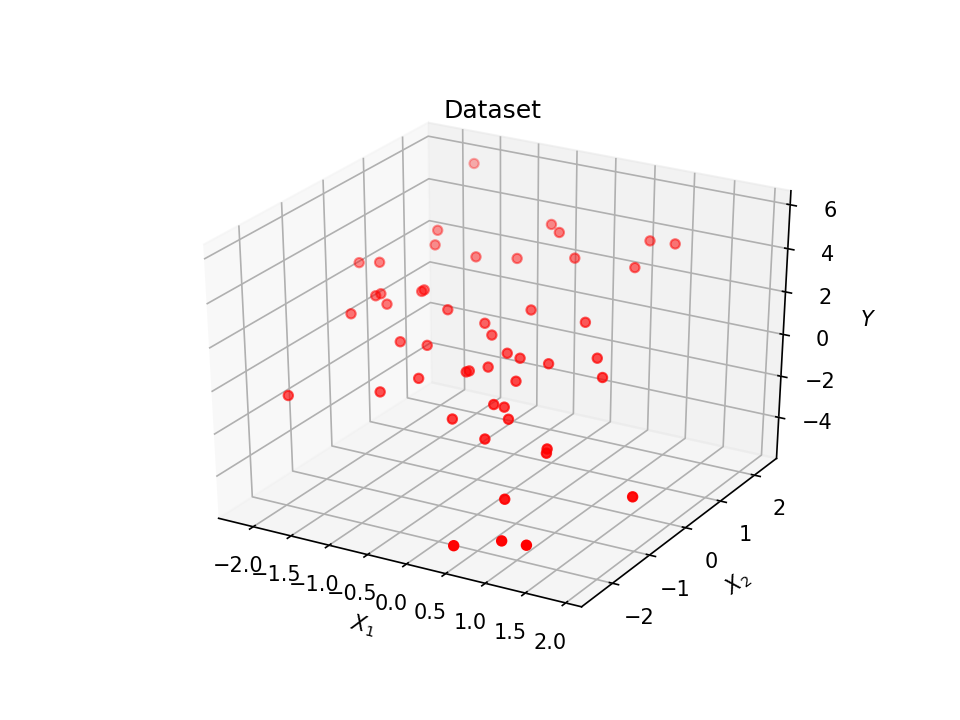

In [9]:
# visualize the dataset
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0].numpy(), X[:,1].numpy(), y.numpy(), c='r', marker='o')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$Y$')

plt.title('Dataset')
plt.show()

In [10]:
def visualize_fun(w, title, num_pts=20):
    
    x1, x2 = np.meshgrid(np.linspace(-2,2, num_pts), np.linspace(-2,2, num_pts))
    X_plane = torch.tensor(np.stack([np.reshape(x1, (num_pts**2)), np.reshape(x2, (num_pts**2))], axis=1)).float()
    y_plane = np.reshape((X_plane @ w).detach().numpy(), (num_pts, num_pts))
    
    plt3d = plt.figure().gca(projection='3d')
    plt3d.plot_surface(x1, x2, y_plane, alpha=0.2)

    ax = plt.gca()
    ax.scatter(X[:,0].numpy(), X[:,1].numpy(), y.numpy(), c='r', marker='o')

    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    ax.set_zlabel('$Y$')
    
    plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


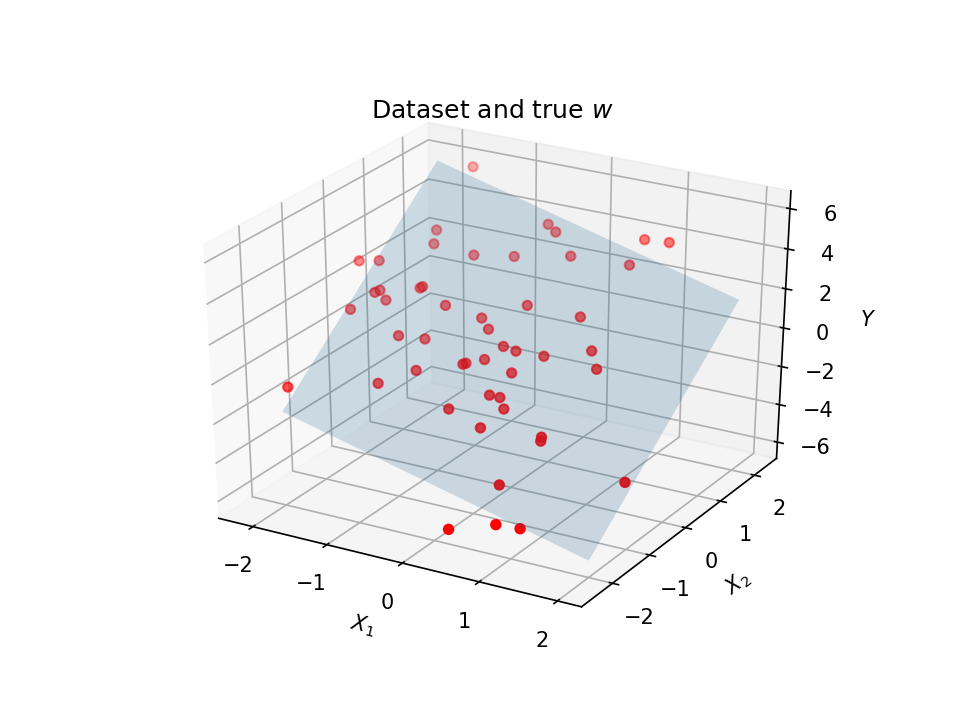

In [11]:
visualize_fun(true_w, 'Dataset and true $w$')

### Sanity check
To verify PyTorch is computing the gradients correctly, let's recall the gradient for the RSS objective:

$$∇_{w}L_{RSS}(w;X)=∇_{w}\frac{1}{n}||y−X_{w}||_{2}^{2}=−\frac{2}{n}X^{T}(y−X_{w})$$
Let's see if the match up:



In [12]:
# define a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
def rss(y, y_hat):
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad=True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('PyTorch\'s gradient', w.grad.view(2).numpy())

Analytical gradient [ 5.1867113 -5.5912566]
PyTorch's gradient [ 5.186712  -5.5912566]


### Linear regression using GD with automatically computed derivatives
We will now use the gradients to run the gradient descent algorithm.

Note: This example is an illustration to connect ideas we have seen before to PyTorch's way of doing things. We will see how to do this in the "PyTorchic" way in the next example.

In [13]:
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward() # compute the gradient of the loss
    
    w.data = w.data - step_size * w.grad # do a gradient descent step
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    w.grad.detach()
    w.grad.zero_()

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	10.80,	[-0.03734243  1.1182513 ]
1,	2.31,	[-0.28690195  1.3653738 ]
2,	1.24,	[-0.4724271  1.5428905]
3,	0.67,	[-0.6105486  1.6702049]
4,	0.36,	[-0.71353513  1.7613506 ]
5,	0.20,	[-0.79044634  1.8264704 ]
6,	0.11,	[-0.8479796  1.8728881]
7,	0.06,	[-0.89109135  1.9058872 ]
8,	0.04,	[-0.92345405  1.9292755 ]
9,	0.03,	[-0.94779253  1.9457937 ]
10,	0.02,	[-0.9661309  1.957412 ]
11,	0.01,	[-0.97997516  1.9655445 ]
12,	0.01,	[-0.9904472  1.9712044]
13,	0.01,	[-0.9983844  1.9751165]
14,	0.01,	[-1.0044125  1.9777979]
15,	0.01,	[-1.0090001  1.9796168]
16,	0.01,	[-1.0124985  1.9808345]
17,	0.01,	[-1.0151719  1.9816359]
18,	0.01,	[-1.0172188  1.9821515]
19,	0.01,	[-1.0187894  1.9824725]

true w		 [-1.  2.]
estimated w	 [-1.0187894  1.9824725]


<IPython.core.display.Javascript object>


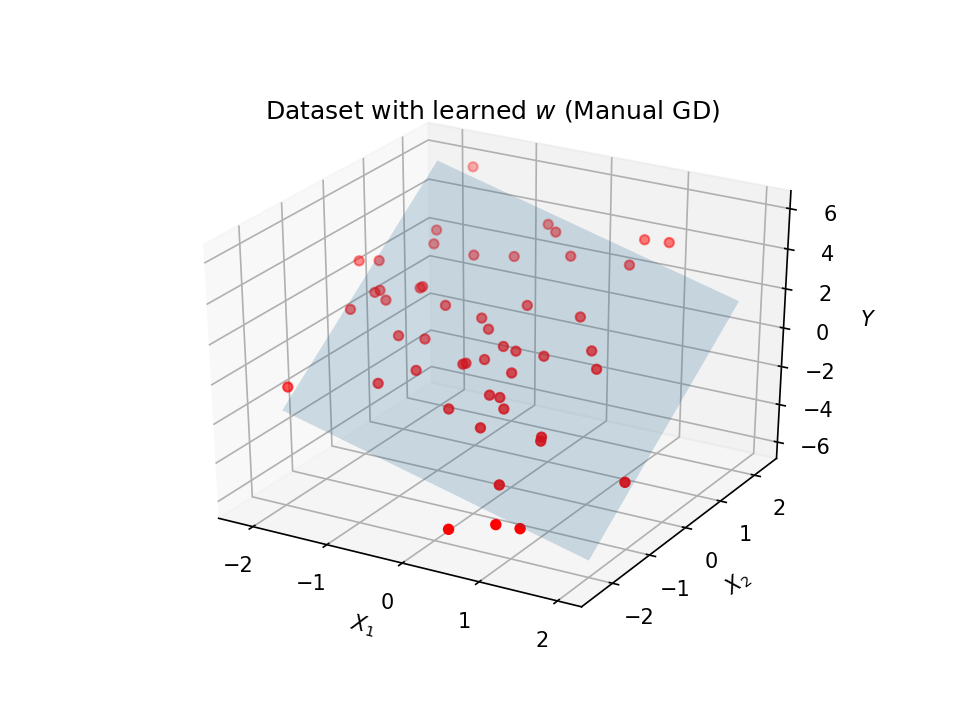

In [14]:
visualize_fun(w, 'Dataset with learned $w$ (Manual GD)')

### torch.nn.Module
`Module` is PyTorch's way of performing operations on tensors. Modules are implemented as subclasses of the `torch.nn.Module` class. All modules are callable and can be composed together to create complex functions.

`torch.nn` [docs](https://pytorch.org/docs/stable/nn.html#torch-nn-functional)

Note: most of the functionality implemented for modules can be accessed in a functional form via `torch.nn.functional`, but these require you to create and manage the weight tensors yourself.

`torch.nn.functional` [docs](https://pytorch.org/docs/stable/nn.functional.html).

### Linear Module
The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our  w  manually, the Linear module automatically initializes the weights randomly. For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results. If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in `torch.nn.init`.

`torch.nn.init` [docs](https://pytorch.org/docs/stable/nn.html)

In [16]:
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch.tensor([[1.,2,3], [4,5,6]])
# applys a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([2, 3])
transormed torch.Size([2, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[ 0.2151, -0.2631,  0.4498],
        [-0.3092,  0.3098, -0.4239],
        [-0.0499, -0.2222,  0.0085],
        [-0.0356,  0.5260,  0.4925]], requires_grad=True)
b: Parameter containing:
tensor([-0.0887,  0.3944,  0.4080,  0.2182], requires_grad=True)


### Activation functions
PyTorch implements a number of activation functions including but not limited to ReLU, Tanh, and Sigmoid. Since they are modules, they need to be instantiated.

In [17]:
activation_fn = nn.ReLU() # we instantiate an instance of the ReLU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


### Sequential
Many times, we want to compose Modules together. `torch.nn.Sequential` provides a good interface for composing simple modules.

In [18]:
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
                            nn.Linear(d_in, d_hidden),
                            nn.Tanh(),
                            nn.Linear(d_hidden, d_out),
                            nn.Sigmoid()
                           )

example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)

transformed torch.Size([2, 1])


Note: we can access all of the parameters (of any `nn.Module`) with the `parameters()` method.

In [19]:
params = model.parameters()

for param in params:
    print(param)

Parameter containing:
tensor([[-0.1409,  0.0518,  0.3034],
        [ 0.0913,  0.2452, -0.2616],
        [ 0.5021,  0.0118,  0.1383],
        [ 0.4757, -0.3128,  0.2707]], requires_grad=True)
Parameter containing:
tensor([-0.3952,  0.1285,  0.1777, -0.4675], requires_grad=True)
Parameter containing:
tensor([[ 0.0391, -0.4876, -0.1731,  0.4704]], requires_grad=True)
Parameter containing:
tensor([0.0454], requires_grad=True)


### Loss functions
PyTorch implements many common loss functions including `MSELoss` and `CrossEntropyLoss`.

In [20]:
mse_loss_fn = nn.MSELoss()

input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mse_loss_fn(input, target)

print(loss)

tensor(0.6667)


### `torch.optim`
PyTorch implements a number of gradient-based optimization methods in `torch.optim`, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.

Optimizers do not compute the gradients for you, so you must call `backward()` yourself. You also must call the `optim.zero_grad()` function before calling `backward()` since by default PyTorch does and inplace add to the `.grad` member variable rather than overwriting it.

This does both the `detach_()` and `zero_()` calls on all tensor's grad variables.

`torch.optim` [docs](https://pytorch.org/docs/stable/optim.html)

In [21]:
model = nn.Linear(1, 1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
mse_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[0.1950]], requires_grad=True)
model params after: Parameter containing:
tensor([[0.2219]], requires_grad=True)


As we can see, the parameter was updated in the correct direction


### Linear regression using GD with automatically computed derivatives and PyTorch's Modules¶
Now let's combine what we've learned to solve linear regression in a "PyTorchic" way.

In [22]:
step_size = 0.1

linear_module = nn.Linear(d, 1, bias=False)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)

print('iter,\tloss,\tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	4.37,	[-0.5072827  0.7721884]
1,	2.34,	[-0.6624694  1.0903175]
2,	1.25,	[-0.77252483  1.3242052 ]
3,	0.67,	[-0.8503067  1.4962891]
4,	0.36,	[-0.90506    1.6230037]
5,	0.20,	[-0.94342256  1.716392  ]
6,	0.11,	[-0.9701522  1.7852831]
7,	0.06,	[-0.98865306  1.8361537 ]
8,	0.04,	[-1.0013554  1.8737577]
9,	0.02,	[-1.0099901  1.9015862]
10,	0.02,	[-1.0157865  1.9222052]
11,	0.01,	[-1.019615   1.9375019]
12,	0.01,	[-1.0220896  1.9488654]
13,	0.01,	[-1.0236413  1.9573189]
14,	0.01,	[-1.0245715  1.963617 ]
15,	0.01,	[-1.0250894  1.9683164]
16,	0.01,	[-1.0253391  1.9718288]
17,	0.01,	[-1.0254192  1.9744583]
18,	0.01,	[-1.0253965  1.9764304]
19,	0.01,	[-1.025315   1.9779121]

true w		 [-1.  2.]
estimated w	 [-1.025315   1.9779121]


<IPython.core.display.Javascript object>


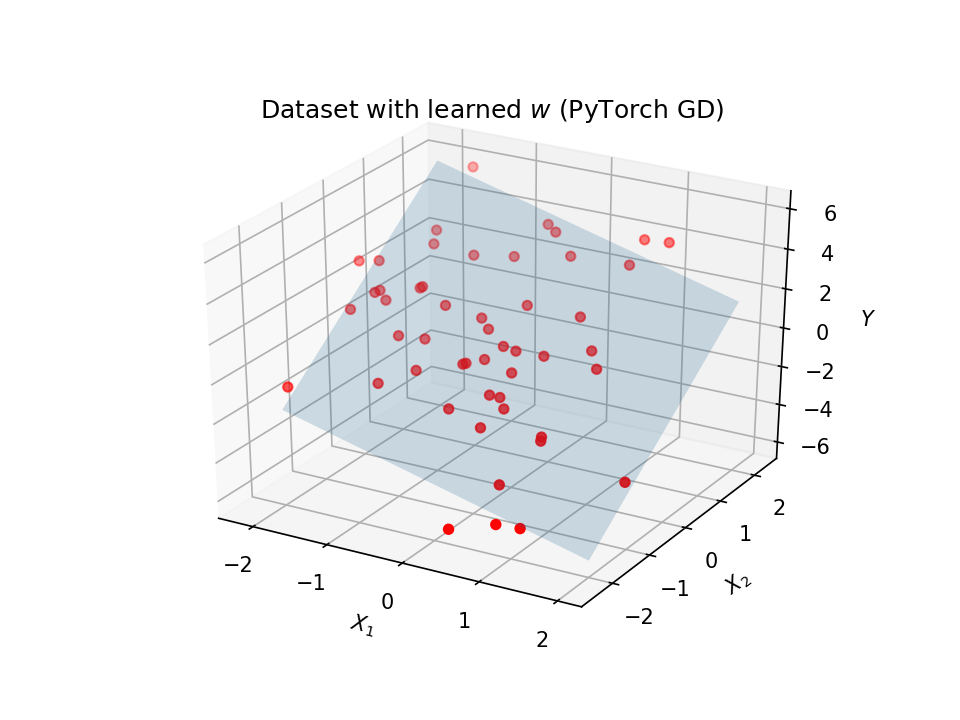

In [23]:
visualize_fun(linear_module.weight.t(), 'Dataset with learned $w$ (PyTorch GD)')

### Linear regression using SGD
In the previous examples, we computed the average gradient over the entire dataset (Gradient Descent). We can implement Stochastic Gradient Descent with a simple modification.

In [24]:
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)
print('iter,\tloss,\tw')
for i in range(200):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx] 
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx]) # only compute the loss on the single point
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	0.01,	[-0.16747226  0.69458336]
20,	0.73,	[-0.52777785  1.409119  ]
40,	0.05,	[-0.7416818  1.7194623]
60,	0.04,	[-0.80749375  1.8314769 ]
80,	0.09,	[-0.888827   1.8813882]
100,	0.06,	[-0.93712914  1.9570426 ]
120,	0.00,	[-0.964763   1.9772898]
140,	0.00,	[-0.9806282  1.9791763]
160,	0.04,	[-0.9831248  1.9838824]
180,	0.01,	[-0.9979536  1.9885796]

true w		 [-1.  2.]
estimated w	 [-0.9991454  1.9860797]


<IPython.core.display.Javascript object>


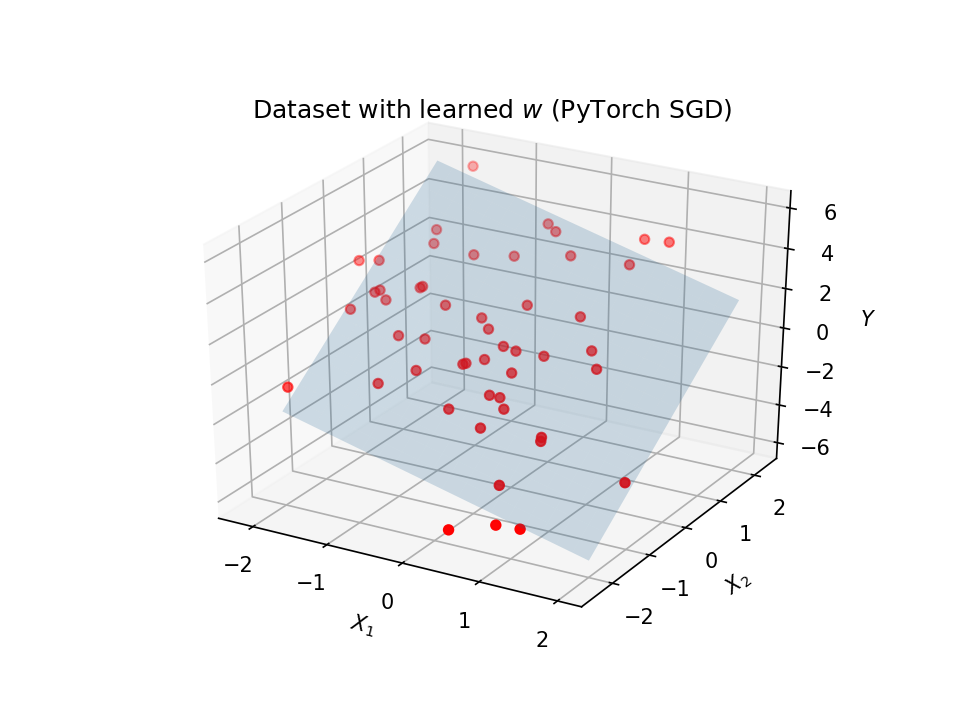

In [25]:
visualize_fun(linear_module.weight.t(), 'Dataset with learned $w$ (PyTorch SGD)')

### Neural Network Basics in PyTorch
Let's consider the dataset from hw3. We will try and fit a simple neural network to the data.

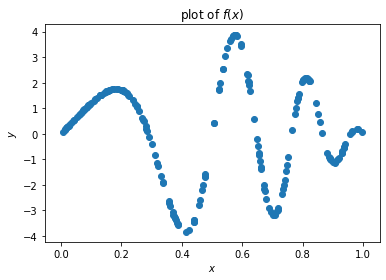

In [26]:
%matplotlib inline

d = 1
n = 200
X = torch.rand(n,d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

Here we define a simple two hidden layer neural network with Tanh activations. There are a few hyper parameters to play with to get a feel for how they change the results.

In [27]:
# feel free to play with these parameters

step_size = 0.05
n_epochs = 6000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
                            nn.Linear(d, n_hidden_1), 
                            nn.Tanh(),
                            nn.Linear(n_hidden_1, n_hidden_2),
                            nn.Tanh(),
                            nn.Linear(n_hidden_2, d_out)
                            )

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), lr=step_size)
print('iter,\tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (n_epochs // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss.item()))

iter,	loss
0,	3.96
600,	3.69
1200,	2.58
1800,	1.10
2400,	0.91
3000,	0.68
3600,	0.14
4200,	0.08
4800,	0.06
5400,	0.15


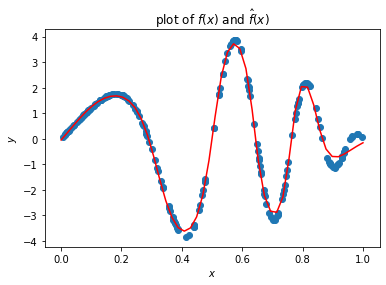

In [28]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Things that might help on the homework
#### Brief Sidenote: Momentum
There are other optimization algorithms besides stochastic gradient descent. One is a modification of SGD called momentum. We won't get into it here, but if you would like to read more [here](https://distill.pub/2017/momentum/) is a good place to start.

We only change the step size and add the momentum keyword argument to the optimizer. Notice how it reduces the training loss in fewer iterations.

In [29]:
# feel free to play with these parameters

step_size = 0.05
momentum = 0.9
n_epochs = 1500
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
                            nn.Linear(d, n_hidden_1), 
                            nn.Tanh(),
                            nn.Linear(n_hidden_1, n_hidden_2),
                            nn.Tanh(),
                            nn.Linear(n_hidden_2, d_out)
                            )

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), lr=step_size, momentum=momentum)
print('iter,\tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (n_epochs // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss.item()))
        

iter,	loss
0,	3.83
150,	3.06
300,	0.74
450,	0.12
600,	0.04
750,	0.03
900,	0.01
1050,	0.00
1200,	0.00
1350,	0.00


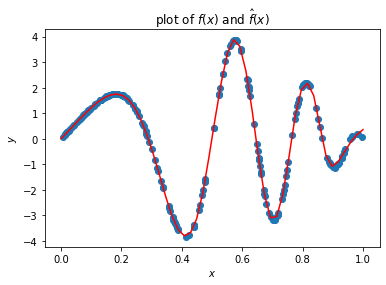

In [30]:
X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### CrossEntropyLoss
So far, we have been considering regression tasks and have used the [MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss) module. For the homework, we will be performing a classification task and will use the cross entropy loss.

PyTorch implements a version of the cross entropy loss in one module called [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss). Its usage is slightly different than MSE, so we will break it down here.

input: The first parameter to CrossEntropyLoss is the output of our network. It expects a real valued tensor of dimensions  $(N,C)$  where  $N$  is the minibatch size and  $C$  is the number of classes. In our case  $N=3$  and  $C=2$ . The values along the second dimension correspond to raw unnormalized scores for each class. The CrossEntropyLoss module does the softmax calculation for us, so we do not need to apply our own softmax to the output of our neural network.
output: The second parameter to CrossEntropyLoss is the true label. It expects an integer valued tensor of dimension  ($N$) . The integer at each element corresponds to the correct class. In our case, the "correct" class labels are class 0, class 1, and class 1.
Try out the loss function on three toy predictions. The true class labels are  $y=[1,1,0]$ . The first two examples correspond to predictions that are "correct" in that they have higher raw scores for the correct class. The second example is "more confident" in the prediction, leading to a smaller loss. The last two examples are incorrect predictions with lower and higher confidence respectively.

In [31]:
loss = nn.CrossEntropyLoss()

input = torch.tensor([[-1., 1],[-1, 1],[1, -1]]) # raw scores correspond to the correct class
# input = torch.tensor([[-3., 3],[-3, 3],[3, -3]]) # raw scores correspond to the correct class with higher confidence
# input = torch.tensor([[1., -1],[1, -1],[-1, 1]]) # raw scores correspond to the incorrect class
# input = torch.tensor([[3., -3],[3, -3],[-3, 3]]) # raw scores correspond to the incorrect class with incorrectly placed confidence

target = torch.tensor([1, 1, 0])
output = loss(input, target)
print(output)

tensor(0.1269)


### Learning rate schedulers
Often we do not want to use a fixed learning rate throughout all training. PyTorch offers learning rate schedulers to change the learning rate over time. Common strategies include multiplying the lr by a constant every epoch (e.g. 0.9) and halving the learning rate when the training loss flattens out.

See the [learning rate scheduler docs](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for usage and examples

### Convolutions
When working with images, we often want to use convolutions to extract features using convolutions. PyTorch implments this for us in the torch.nn.Conv2d module. It expects the input to have a specific dimension  ($N$,$C_{in}$,$H_{in}$,$W_{in}$)  where  $N$  is batch size,  $C_{in}$  is the number of channels the image has, and  $H_{in}$,$W_{in}$  are the image height and width respectively.

We can modify the convolution to have different properties with the parameters:

- kernel_size
- stride
- padding
They can change the output dimension so be careful.

See the `torch.nn.Conv2d` [docs](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for more information.

To illustrate what the `Conv2d` module is doing, let's set the conv weights manually to a Gaussian blur kernel.

We can see that it applies the kernel to the image.

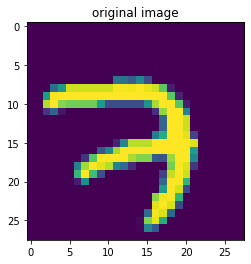

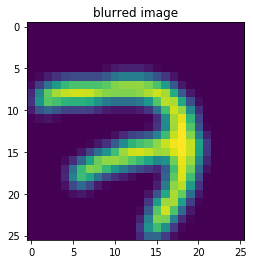

In [32]:
# an entire mnist digit
image = np.array([0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3803922 , 0.37647063, 0.3019608 ,0.46274513, 0.2392157 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.3529412 , 0.5411765 , 0.9215687 ,0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 , 0.9215687 ,0.9843138 , 0.9843138 , 0.9725491 , 0.9960785 , 0.9607844 ,0.9215687 , 0.74509805, 0.08235294, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.54901963,0.9843138 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.7411765 , 0.09019608, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8862746 , 0.9960785 , 0.81568635,0.7803922 , 0.7803922 , 0.7803922 , 0.7803922 , 0.54509807,0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 , 0.2392157 ,0.5019608 , 0.8705883 , 0.9960785 , 0.9960785 , 0.7411765 ,0.08235294, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.14901961, 0.32156864, 0.0509804 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.13333334,0.8352942 , 0.9960785 , 0.9960785 , 0.45098042, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.32941177, 0.9960785 ,0.9960785 , 0.9176471 , 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.32941177, 0.9960785 , 0.9960785 , 0.9176471 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.4156863 , 0.6156863 ,0.9960785 , 0.9960785 , 0.95294124, 0.20000002, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.09803922, 0.45882356, 0.8941177 , 0.8941177 ,0.8941177 , 0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.94117653, 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.26666668, 0.4666667 , 0.86274517,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.5568628 ,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.14509805, 0.73333335,0.9921569 , 0.9960785 , 0.9960785 , 0.9960785 , 0.8745099 ,0.8078432 , 0.8078432 , 0.29411766, 0.26666668, 0.8431373 ,0.9960785 , 0.9960785 , 0.45882356, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.4431373 , 0.8588236 , 0.9960785 , 0.9490197 , 0.89019614,0.45098042, 0.34901962, 0.12156864, 0., 0.,0., 0., 0.7843138 , 0.9960785 , 0.9450981 ,0.16078432, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.6627451 , 0.9960785 ,0.6901961 , 0.24313727, 0., 0., 0.,0., 0., 0., 0., 0.18823531,0.9058824 , 0.9960785 , 0.9176471 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0.07058824, 0.48627454, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.32941177, 0.9960785 , 0.9960785 ,0.6509804 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.54509807, 0.9960785 , 0.9333334 , 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.8235295 , 0.9803922 , 0.9960785 ,0.65882355, 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0.9490197 , 0.9960785 , 0.93725497, 0.22352943, 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.34901962, 0.9843138 , 0.9450981 ,0.3372549 , 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.01960784,0.8078432 , 0.96470594, 0.6156863 , 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.01568628, 0.45882356, 0.27058825,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0., 0.,0., 0., 0., 0.], dtype=np.float32)
image_torch = torch.from_numpy(image).view(1, 1, 28, 28)

# a gaussian blur kernel
gaussian_kernel = torch.tensor([[1., 2, 1],[2, 4, 2],[1, 2, 1]]) / 16.0

conv = nn.Conv2d(1, 1, 3)
# manually set the conv weight
conv.weight.data[:] = gaussian_kernel

convolved = conv(image_torch)

plt.title('original image')
plt.imshow(image_torch.view(28,28).detach().numpy())
plt.show()

plt.title('blurred image')
plt.imshow(convolved.view(26,26).detach().numpy())
plt.show()

As we can see, the image is blurred as expected.

In practice, we learn many kernels at a time. In this example, we take in an RGB image (3 channels) and output a 16 channel image. After an activation function, that could be used as input to another `Conv2d` module.

In [33]:
im_channels = 3 # if we are working with RGB images, there are 3 input channels, with black and white, 1
out_channels = 16 # this is a hyperparameter we can tune
kernel_size = 3 # this is another hyperparameter we can tune
batch_size = 4
image_width = 32
image_height = 32

im = torch.randn(batch_size, im_channels, image_width, image_height)

m = nn.Conv2d(im_channels, out_channels, kernel_size)
convolved = m(im) # it is a module so we can call it

print('im shape', im.shape)
print('convolved im shape', convolved.shape)

im shape torch.Size([4, 3, 32, 32])
convolved im shape torch.Size([4, 16, 30, 30])


### Useful links:
- [60 minute PyTorch Tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [PyTorch Docs](https://pytorch.org/docs/stable/index.html)
- [Lecture notes on Auto-Diff](https://courses.cs.washington.edu/courses/cse446/19wi/notes/auto-diff.pdf)